In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Loading Data

In [2]:
DATA_PATH = "../data//toy_data.csv"
DATA_PATH = "/Users/philipp/Documents/GitHub/ml-project-2-aiidalearn/data/toy_data.csv"

In [3]:
df = pd.read_csv(DATA_PATH)

In [4]:
cols_raw = list(df.columns)
cols_trash = ['Unnamed: 0', 'converged']
cols_independent = ['accuracy']
cols_drop = cols_trash + cols_independent

cols_dependent = cols_raw.copy()
for element in cols_drop:
    cols_dependent.remove(element)


In [6]:
X_raw = df[cols_dependent].to_numpy()
y_raw = df[cols_independent].to_numpy()

# Train-Test-Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y_raw,
    test_size=0.1,
    random_state=42)

# Pipeline Definition

## Linear Model with polynomial feature augmentation

In [8]:
#DEFINITION OF PREPROCESSING STEPS
scaler = StandardScaler()
poly_augmentation = PolynomialFeatures(degree=3)

In [9]:
#DEFINITION OF REGRESSOR
linear_regressor = LinearRegression()
#regressor = GradientBoostingRegressor

In [10]:
#COMBINING EVERYTHING TO A PIPELINE
simple_model = Pipeline([
    ('poly', poly_augmentation),
    ('scaler', scaler),
    ('regressor', linear_regressor)
])

In [11]:
simple_model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [12]:
simple_model.score(X_test, y_test)

-0.0789178801928021

In [13]:
mean_squared_error(y_test, simple_model.predict(X_test))

8.963721601237086e-26

## Random Forest

In [14]:
rf_regressor = RandomForestRegressor()
rf_model = Pipeline([
    ('poly', poly_augmentation),
    ('scaler', scaler),
    ('regressor', rf_regressor)
])

In [16]:
rf_model.fit(X_train, y_train)

/Users/philipp/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

In [17]:
rf_model.score(X_test, y_test)

0.5261209331991763

# Visualization

In [18]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'ecutwfc')

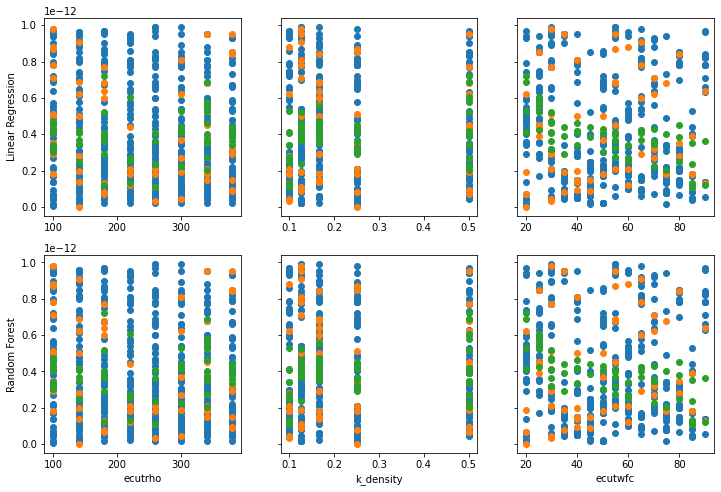

In [19]:
fig, ax = plt.subplots(2,3,figsize=(12,8), sharey=True)
for j in range(2):
    for i in range(3):
        ax[j,i].scatter(X_train[:,i], y_train)
        ax[j,i].scatter(X_test[:, i], y_test)
        ax[j,i].scatter(X_test[:, i], simple_model.predict(X_test))
ax[0,0].set_ylabel("Linear Regression")
ax[1,0].set_ylabel("Random Forest")
ax[1,0].set_xlabel("ecutrho")
ax[1,1].set_xlabel('k_density')
ax[1,2].set_xlabel('ecutwfc')